In [21]:
# from diffusers import LMSDiscreteScheduler, ControlNetModel, EulerAncestralDiscreteScheduler
# from mixdiff import StableDiffusionCanvasControlnetPipeline
# from mixdiff.canvas_multicontrolnet import Text2ImageRegion
# import torch
# from PIL import Image

# # Creater scheduler and model (similar to StableDiffusionPipeline)
# controlnet_canny = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny" 
#                                             ).to("cuda")
# # controlnet_pose = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", 
# #                                                    ).to("cuda")


# scheduler = EulerAncestralDiscreteScheduler.from_pretrained("/home/tyh/.cache/huggingface/diffusers/models--darkstorm2150--Protogen_x5.8_Official_Release/snapshots/6b34da7619eeed9623c0def230c7c94cb2863e7d",subfolder="scheduler")
# pipeline = StableDiffusionCanvasControlnetPipeline.from_pretrained("/home/tyh/.cache/huggingface/diffusers/models--darkstorm2150--Protogen_x5.8_Official_Release/snapshots/6b34da7619eeed9623c0def230c7c94cb2863e7d",
#                                                                     scheduler=scheduler, use_auth_token=True,
#                                                                     	controlnet=[
#     controlnet_canny,controlnet_canny,controlnet_canny,controlnet_canny,controlnet_canny,controlnet_canny,controlnet_canny,controlnet_canny,controlnet_canny
# 	],).to("cuda:0")



# image1 = Image.open('/home/tyh/Desktop/33.png').crop((0,0,512,640))
# image2 = Image.open('/home/tyh/Desktop/33.png').crop((256,0,768,640))
# image3 = Image.open('/home/tyh/Desktop/33.png').crop((512,0,1024,640))
# image4 = Image.open('/home/tyh/Desktop/33.png').crop((0,384,512,1024))
# image5 = Image.open('/home/tyh/Desktop/33.png').crop((256,384,768,1024))
# image6 = Image.open('/home/tyh/Desktop/33.png').crop((512,384,1024,1024))
# image7 = Image.open('/home/tyh/Desktop/33.png').crop((0,768,512,1408))
# image8 = Image.open('/home/tyh/Desktop/33.png').crop((256,768,768,1408))
# image9 = Image.open('/home/tyh/Desktop/33.png').crop((512,768,1024,1408))



# # Mixture of Diffusers generation
# # import time
# # t1 = time.time()


# main_prompt="a poster that says end global warming learn what you can do to help, flat design, icon for weather app, pexels contest winner, multicolored tshirt art, inspired by William Crozier, tornado, folded arms, 4 0 k, informative guide, summer camp, hyper realistic illustration, roof background"

# image = pipeline(
#     canvas_height=1408,
#     canvas_width=1024,
#     regions=[
#         Text2ImageRegion(0, 640, 0, 512, guidance_scale=8,      # height first then width
#             prompt= f"" + main_prompt),
#         Text2ImageRegion(0, 640, 256, 768, guidance_scale=8,
#             prompt=  f"" + main_prompt),
#         Text2ImageRegion(0, 640, 512, 1024, guidance_scale=8,
#             prompt= f"" + main_prompt),
#         Text2ImageRegion(384, 1024, 0, 512, guidance_scale=8,      # height first then width
#             prompt= f"" + main_prompt),
#         Text2ImageRegion(384, 1024, 256, 768, guidance_scale=8,
#             prompt=  f"" + main_prompt),
#         Text2ImageRegion(384, 1024, 512, 1024, guidance_scale=8,
#             prompt=  f"" + main_prompt),
#         Text2ImageRegion(768, 1408, 0, 512, guidance_scale=8,      # height first then width
#             prompt= f"" + main_prompt),
#         Text2ImageRegion(768, 1024, 256, 768, guidance_scale=8,
#             prompt=  f"" + main_prompt),
#         Text2ImageRegion(768, 1024, 512, 1024, guidance_scale=8,
#             prompt=  f"" + main_prompt),
#     ],
#     image=[image1, image2,image3,image4,image5,image6,image7,image8,image9],    num_inference_steps=50,
#     seed=7178915308,
# )["sample"][0]
# # print(time.time()-t1)
# image

0it [00:00, ?it/s]

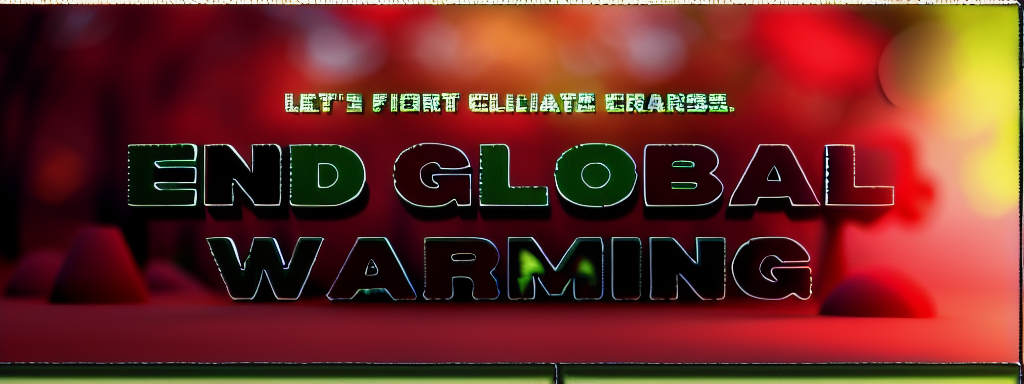

In [5]:
from diffusers import LMSDiscreteScheduler, ControlNetModel, EulerAncestralDiscreteScheduler
from mixdiff import StableDiffusionCanvasControlnetPipeline, preprocess_image
from mixdiff.canvas_multicontrolnet import Text2ImageRegion, Image2ImageRegion
import torch
from PIL import Image

model_id_or_path = "/home/tyh/.cache/huggingface/diffusers/models--darkstorm2150--Protogen_x5.8_Official_Release/snapshots/6b34da7619eeed9623c0def230c7c94cb2863e7d"

# Creater scheduler and model (similar to StableDiffusionPipeline)
controlnet_hed = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-hed" 
                                            ).to("cuda")
controlnet_canny = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny" 
                                            ).to("cuda")
# controlnet_pose = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", 
#                                                    ).to("cuda")


scheduler = EulerAncestralDiscreteScheduler.from_pretrained(model_id_or_path,subfolder="scheduler")
pipeline = StableDiffusionCanvasControlnetPipeline.from_pretrained(model_id_or_path,
                                                                    scheduler=scheduler, 
                                                                    	controlnet=[
    [controlnet_canny,controlnet_hed]#controlnet_canny,controlnet_canny,controlnet_canny,controlnet_canny,controlnet_canny,controlnet_canny,controlnet_canny,controlnet_canny
	],).to("cuda:0")


image1 = Image.open('/home/tyh/Desktop/33.png').convert('RGB').crop((0,0,1024,384))
image2 = Image.open('/home/tyh/Desktop/hed1.jpg').convert('RGB').crop((0,0,1024,384))
iic = image2
# image1 = Image.open('/home/tyh/Desktop/33.png').convert('RGB').crop((0,0,512,640)
# image2 = Image.open('/home/tyh/Desktop/33.png').convert('RGB').crop((256,0,768,640))
# image3 = Image.open('/home/tyh/Desktop/33.png').convert('RGB').crop((512,0,1024,640))
# image4 = Image.open('/home/tyh/Desktop/33.png').convert('RGB').crop((0,384,512,1024))
# image5 = Image.open('/home/tyh/Desktop/33.png').convert('RGB').crop((256,384,768,1024))
# image6 = Image.open('/home/tyh/Desktop/33.png').convert('RGB').crop((512,384,1024,1024))
# image7 = Image.open('/home/tyh/Desktop/33.png').convert('RGB').crop((0,768,512,1408))
# image8 = Image.open('/home/tyh/Desktop/33.png').convert('RGB').crop((256,768,768,1408))
# image9 = Image.open('/home/tyh/Desktop/33.png').convert('RGB').crop((512,768,1024,1408))



# Mixture of Diffusers generation
# import time
# t1 = time.time()


style=", background in a forest, digital 3 d, coloful background, trending on artstation"
main_prompt1=style+" with flowers and trees aroung the words"
main_prompt = "white color texts in a forest surrounded by flowers and moss， background in a forest, digital 3 d, coloful background, trending on artstation"

image = pipeline(
    canvas_height=384,
    canvas_width=1024,
    regions=[
        Text2ImageRegion(0, 384, 0, 1024, guidance_scale=30,      # height first then width
            prompt= main_prompt),
        # Text2ImageRegion(0, 640, 256, 768, guidance_scale=8,
        #     prompt=  f"fired wooden font: let's fight climate change end global warming, " + main_prompt),
        # Text2ImageRegion(0, 640, 512, 1024, guidance_scale=8,
        #     prompt= f"fired wooden font: let's fight climate change end global warming,  with a blue cloud" + main_prompt),
        # Text2ImageRegion(384, 1024, 0, 512, guidance_scale=8,      # height first then width
        #     prompt= f"yellow color of tthermometer and the shiny sun, " + main_prompt),
        # Text2ImageRegion(384, 1024, 256, 768, guidance_scale=8,
        #     prompt=  f"" + main_prompt),
        # Text2ImageRegion(384, 1024, 512, 1024, guidance_scale=8,
        #     prompt=  f"shiny white font: every action counts!, a woman wearing orange shirt, " + main_prompt),
        # Text2ImageRegion(768, 1408, 0, 512, guidance_scale=8,      # height first then width
        #     prompt= f"a card with take care of earth, " + main_prompt),
        # Text2ImageRegion(768, 1408, 256, 768, guidance_scale=8,
        #     prompt=  f"apple-font-like learn what you can do to help" + main_prompt),
        # Text2ImageRegion(768, 1408, 512, 1024, guidance_scale=8,
        #     prompt=  f"" + main_prompt),
        # Image2ImageRegion(0,384,0,1024, reference_image=iic, strength=0.1)
    ],
    # init_image=image2,
    # strength=0.1,
    # mode='img2img',
    image=[[image1,image2]], #image2,image3,image4,image5,image6,image7,image8,image9],    num_inference_steps=50,
    controlnet_conditioning_scale = [[1,1]],
    num_inference_steps=50
)["sample"][0]
# print(time.time()-t1)
image

In [3]:
from PIL import Image
image2 = Image.open('/home/tyh/Desktop/44.jpg').convert('RGB').crop((0,0,1024,384))
image2.save("/home/tyh/Desktop/dqeiwuhdfuqwdfuqiwhdf.jpg")

  0%|          | 0/27 [00:00<?, ?it/s]

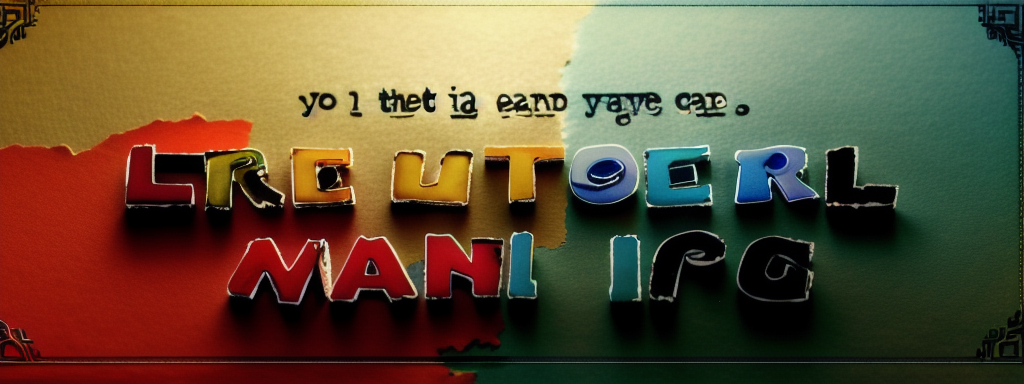

In [ ]:
from diffusers import StableDiffusionImg2ImgPipeline
init_img = image
device = "cuda"
main_prompt = "white letter"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id_or_path, scheduler =scheduler,torch_dtype=torch.float16)
pipe = pipe.to(device)

image2 = pipe(prompt=main_prompt, image=init_img, strength=0.55, guidance_scale=30, num_inference_steps=50).images[0]
image2

In [ ]:
from PIL import Image
aa = Image.open("/home/tyh/Desktop/hed.jpg")
aa = aa.resize((1024,1408))
aa.save("/home/tyh/Desktop/hed1.jpg")